In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.options.display.max_columns = None

In [9]:
result = pd.read_csv('../data/water/CA-result-withmeasuregroup.csv')
station = pd.read_csv('../data/water/CA-station-clean.csv', low_memory=False)
data = pd.merge(result, station, left_on='LocationIdentifier', right_on='MonitoringLocationId')

del result
del station

In [64]:
mcls = pd.read_csv('../data/water/measuregroup.csv',
                  usecols=['MeasureGroup', 'MCLG', 'MCL'])
mcls.columns = ['Pollutant', 'MCLG', 'MCL']
mcls = mcls[mcls.Pollutant.isin(data.Pollutant.unique())].reset_index(drop=True)
mcls

,Pollutant,MCLG,MCL
0,Antimony,0.006,0.0060
1,Arsenic,0.000,0.0100
2,Barium,2.000,2.0000
3,Beryllium,0.004,0.0040
4,Cadmium,0.004,0.0050
5,Chromium,0.100,0.1000
6,Copper,1.300,1.3000
7,Fluoride,4.000,4.0000
8,HAA5,NaN,0.0600
9,Lead,0.000,0.0150


In [10]:
data.head(2)

,LocationIdentifier,Medium,MediumSubdivision,StartDate,StartTime,TimeZone,Category,Pollutant,Unit,Mclg,Mcl,Value,ExceedsMclg,ExceedsMcl,Comment,Organization,MonitoringLocationId,MonitoringLocationName,MonitoringLocationType,MonitoringLocationDescription,HUC,DrainageArea,DrainageAreaUnit,ContributingDrainageArea,ContributingDrainageAreaUnit,Latitude,Longitude,VerticalMeasure,VerticalMeasureUnit,StateCode,CountyCode,CountyName,AquiferName,FormationType,AquiferType,Provider,Edits
0,CALWR_WQX-A1723000,Water,NaN,2013-08-06,10:10:00,PST,Inorganic,Arsenic,mg/L,0.0,0.01,0.00608,1.0,False,NaN,California Department of Water Resources,CALWR_WQX-A1723000,FALL RIVER AT GLENBURN,Other-Ground Water,NaN,18020003.0,NaN,NaN,NaN,NaN,41.06242,-121.4811,3312.0,ft,6,89.0,Shasta County,NaN,NaN,NaN,STORET,NaN
1,CALWR_WQX-A1723000,Water,NaN,2011-08-02,10:10:00,PST,Inorganic,Arsenic,mg/L,0.0,0.01,0.00730,1.0,False,NaN,California Department of Water Resources,CALWR_WQX-A1723000,FALL RIVER AT GLENBURN,Other-Ground Water,NaN,18020003.0,NaN,NaN,NaN,NaN,41.06242,-121.4811,3312.0,ft,6,89.0,Shasta County,NaN,NaN,NaN,STORET,NaN


In [11]:
data.describe()

/Users/Sean/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Mclg,Mcl,Value,ExceedsMclg,HUC,DrainageArea,ContributingDrainageArea,Latitude,Longitude,VerticalMeasure,StateCode,CountyCode
count,442172.000000,442172.000000,442172.000000,442172.000000,4.283900e+05,55626.000000,8630.000000,442172.000000,442172.000000,296464.000000,442172.0,442172.000000
mean,1.000940,1.003094,0.881898,0.235951,1.797505e+07,18811.614094,97624.008706,37.716443,-120.702737,774.574057,6.0,61.863248
std,1.393269,1.391718,12.231272,0.482776,4.173506e+05,50505.670676,90058.041354,2.387228,2.062455,1373.377847,0.0,30.756780
min,0.000000,0.000500,0.000000,0.000000,1.503010e+07,0.050000,96.130000,32.543390,-124.366721,-234.000000,6.0,1.000000
25%,0.004000,0.010000,0.000144,0.000000,NaN,NaN,NaN,36.290092,-122.237800,NaN,6.0,37.000000
50%,0.100000,0.080000,0.002000,0.000000,NaN,NaN,NaN,37.676041,-121.228000,NaN,6.0,67.000000
75%,1.300000,1.300000,0.100000,0.000000,NaN,NaN,NaN,39.820883,-119.780701,NaN,6.0,89.000000
max,4.000000,4.000000,1000.000000,24.000000,1.810020e+07,246500.000000,184600.000000,42.004600,-114.139443,10280.000000,6.0,115.000000


### Distributions by pollutant

In [74]:
def drawlimits():
    for i,row in mcls.iterrows():
        plt.subplot(4, 4, i + 1)
        plt.axvline(row.MCLG, color='g', linewidth=1)
        plt.axvline(row.MCL, color='r', linewidth=1)

/Users/Sean/anaconda/lib/python3.5/site-packages/pandas/tools/plotting.py:3369: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  "the passed axes is being cleared", UserWarning)


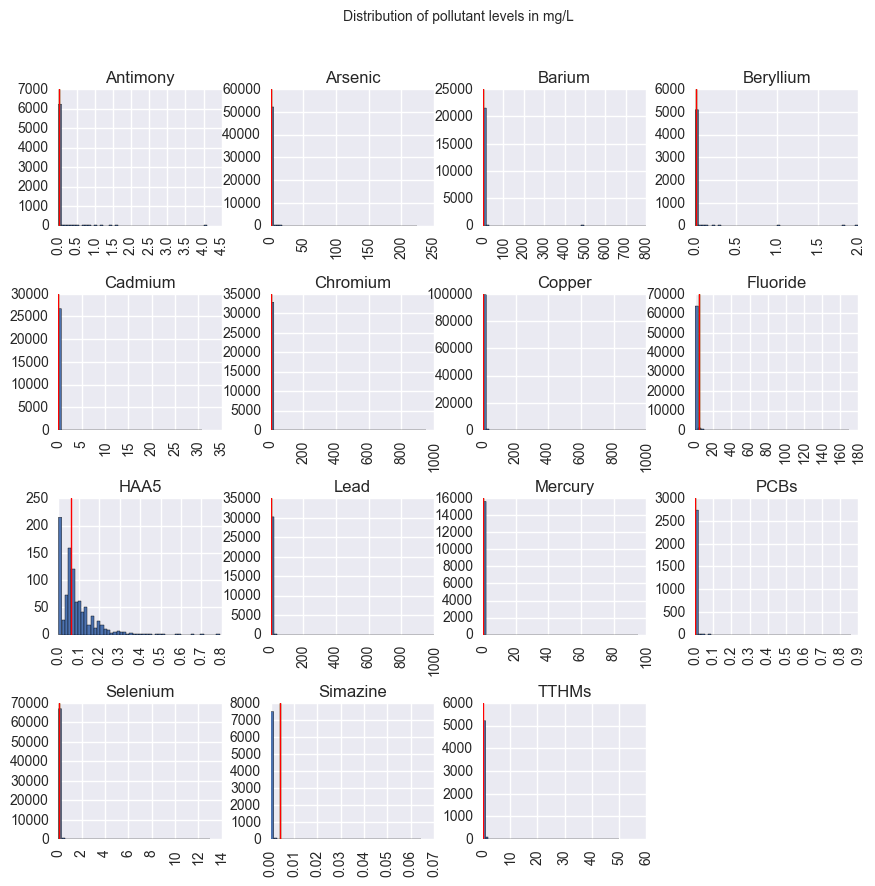

In [76]:
fix,ax = plt.subplots(figsize=(10, 10))
plot = data.hist(column='Value', by='Pollutant', grid=None, ax=ax, bins=50)
_ = plt.suptitle('Distribution of pollutant levels in mg/L')
drawlimits()

/Users/Sean/anaconda/lib/python3.5/site-packages/pandas/tools/plotting.py:3369: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  "the passed axes is being cleared", UserWarning)


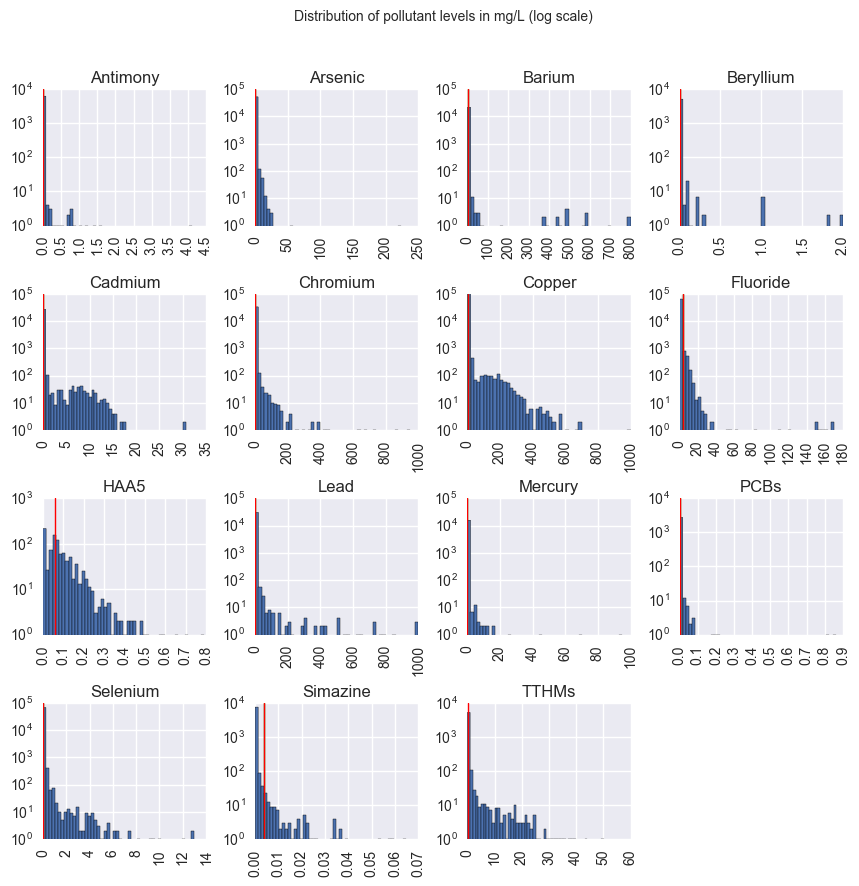

In [77]:
fix,ax = plt.subplots(figsize=(10, 10))
plot = data.hist(column='Value', by='Pollutant', grid=None, ax=ax, bins=50, log=True)
_ = plt.suptitle('Distribution of pollutant levels in mg/L (log scale)')
drawlimits()

/Users/Sean/anaconda/lib/python3.5/site-packages/pandas/tools/plotting.py:3369: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  "the passed axes is being cleared", UserWarning)


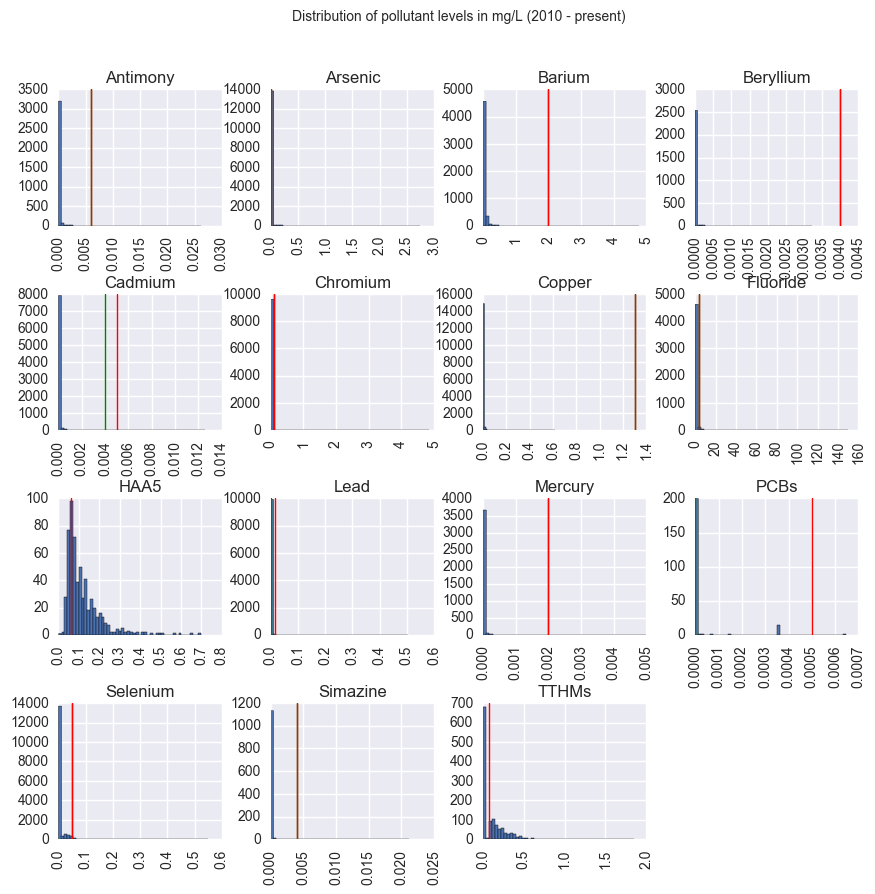

In [78]:
fix,ax = plt.subplots(figsize=(10, 10))
plot = data[data.StartDate >= '2010-01-01']\
    .hist(column='Value', by='Pollutant', grid=None, ax=ax, bins=50)
_ = plt.suptitle('Distribution of pollutant levels in mg/L (2010 - present)')
drawlimits()

/Users/Sean/anaconda/lib/python3.5/site-packages/pandas/tools/plotting.py:3369: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  "the passed axes is being cleared", UserWarning)


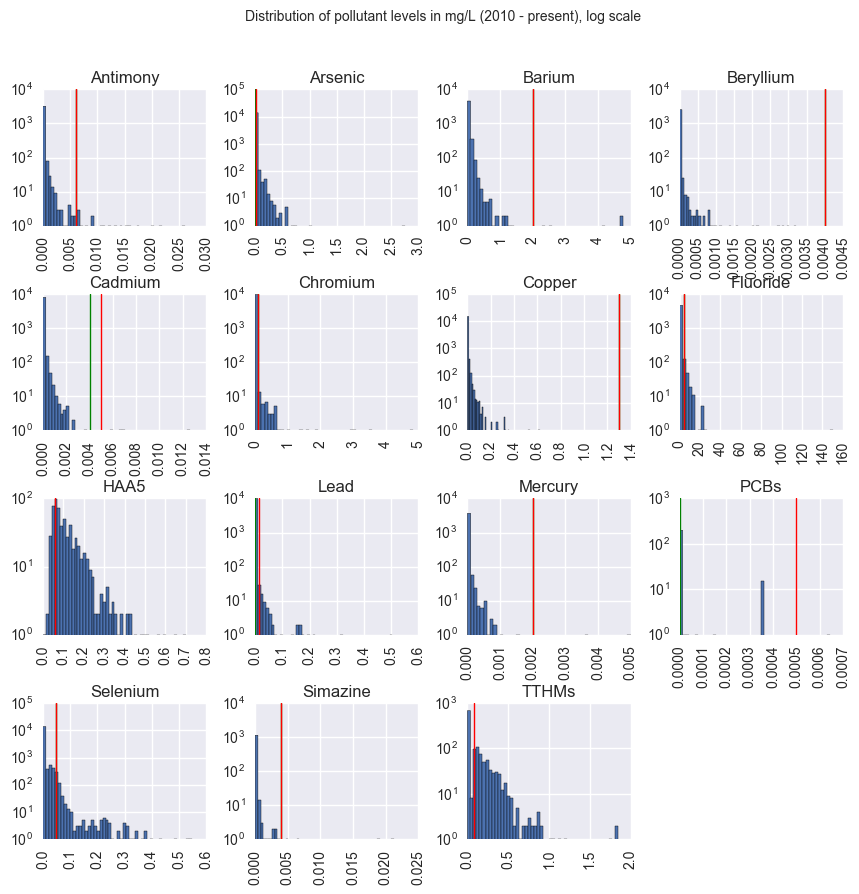

In [79]:
fix,ax = plt.subplots(figsize=(10, 10))
plot = data[data.StartDate >= '2010-01-01']\
    .hist(column='Value', by='Pollutant', grid=None, ax=ax, bins=50, log=True)
_ = plt.suptitle('Distribution of pollutant levels in mg/L (2010 - present), log scale')
drawlimits()

## Annual means and medians over time

In [100]:
data['Year'] = data.StartDate.str.split('-').str[0]

annualMeans = data.groupby(['Pollutant', 'Year']).mean()['Value'].reset_index()
maxes = annualMeans.groupby(['Pollutant']).max()['Value'].reset_index()
maxes.columns = ['Pollutant', 'MaxValue']
annualMeans = pd.merge(annualMeans, maxes, on='Pollutant')
annualMeans['PctOfMax'] = annualMeans.Value / annualMeans.MaxValue
annualMeans.describe()

,Value,MaxValue,PctOfMax
count,736.000000,736.000000,736.000000
mean,2.224271,23.957580,0.106792
std,12.105564,55.905295,0.206126
min,0.000000,0.001578,0.000000
25%,0.000693,0.478654,0.000456
50%,0.016187,5.000000,0.014059
75%,0.434778,12.024849,0.107908
max,192.216667,192.216667,1.000000


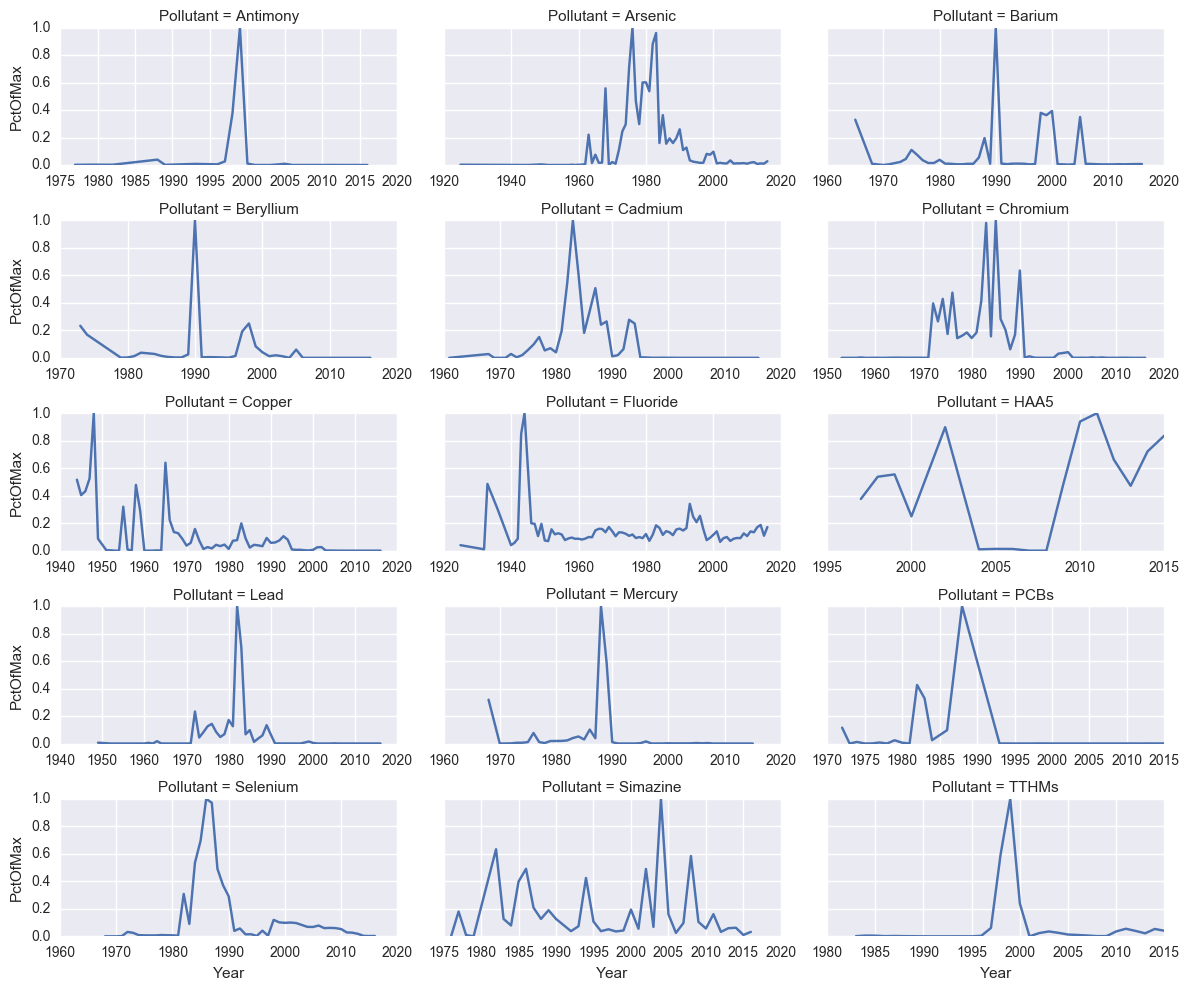

In [110]:
grid=sns.FacetGrid(annualMeans, col='Pollutant', col_wrap=3, sharex=False, size=2, aspect=2)
grid.map(plt.plot, 'Year', 'PctOfMax')